In [1]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve


In [2]:
# Load the dataset
df = pd.read_csv('../data/WA_Fn-UseC_-HR-Employee-Attrition.csv')

print("Dataset shape:", df.shape)
print("\nFirst few rows:")
df.head()

Dataset shape: (1470, 35)

First few rows:


,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [4]:
# Check for missing values
print("Missing values:")
print(df.isnull().sum().sum())

# Check data types
print("\nData types:")
print(df.dtypes.value_counts())

Missing values:
0

Data types:
int64    26
str       9
Name: count, dtype: int64


In [5]:
# Separate features and target
X = df.drop('Attrition', axis=1)
y = df['Attrition']

# Encode target variable (Yes=1, No=0)
le_target = LabelEncoder()
y = le_target.fit_transform(y)

print(f"Target classes: {le_target.classes_}")
print(f"Encoded values: {np.unique(y)}")

Target classes: ['No' 'Yes']
Encoded values: [0 1]


In [6]:
# Identify categorical and numerical columns
categorical_cols = X.select_dtypes(include=['object']).columns.tolist()
numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns.tolist()

print(f"Categorical columns ({len(categorical_cols)}): {categorical_cols}")
print(f"\nNumerical columns ({len(numerical_cols)}): {numerical_cols}")

Categorical columns (8): ['BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus', 'Over18', 'OverTime']

Numerical columns (26): ['Age', 'DailyRate', 'DistanceFromHome', 'Education', 'EmployeeCount', 'EmployeeNumber', 'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']


/var/folders/2v/bn5_gh1x1b14mb5bsw0zj3fh0000gn/T/ipykernel_4628/3822972100.py:2: Pandas4Warning: For backward compatibility, 'str' dtypes are included by select_dtypes when 'object' dtype is specified. This behavior is deprecated and will be removed in a future version. Explicitly pass 'str' to `include` to select them, or to `exclude` to remove them and silence this warning.
See https://pandas.pydata.org/docs/user_guide/migration-3-strings.html#string-migration-select-dtypes for details on how to write code that works with pandas 2 and 3.
  categorical_cols = X.select_dtypes(include=['object']).columns.tolist()


In [7]:
# Encode categorical variables using one-hot encoding
X_encoded = pd.get_dummies(X, columns=categorical_cols, drop_first=True)

print("Categorical variables encoded successfully")
print(f"\nFinal dataset shape: {X_encoded.shape}")

Categorical variables encoded successfully

Final dataset shape: (1470, 47)


In [8]:
# Split the data (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(
    X_encoded, y, test_size=0.2, random_state=42, stratify=y
)

print(f"Training set size: {X_train.shape[0]} samples")
print(f"Test set size: {X_test.shape[0]} samples")
print(f"\nTraining set attrition rate: {y_train.mean():.2%}")
print(f"Test set attrition rate: {y_test.mean():.2%}")

Training set size: 1176 samples
Test set size: 294 samples

Training set attrition rate: 16.16%
Test set attrition rate: 15.99%


In [9]:
# Scale numerical features
scaler = StandardScaler()
X_train_scaled = X_train.copy()
X_test_scaled = X_test.copy()

X_train_scaled[numerical_cols] = scaler.fit_transform(X_train[numerical_cols])
X_test_scaled[numerical_cols] = scaler.transform(X_test[numerical_cols])

print("Features scaled successfully")

Features scaled successfully


BASELINE MODELS - NO IMBALANCE HANDLING
Training Logistic Regression (baseline)...

=== Logistic Regression (Baseline) Results ===

              precision    recall  f1-score   support

No Attrition       0.88      0.96      0.92       247
   Attrition       0.64      0.34      0.44        47

    accuracy                           0.86       294
   macro avg       0.76      0.65      0.68       294
weighted avg       0.85      0.86      0.85       294


ROC-AUC Score: 0.8095


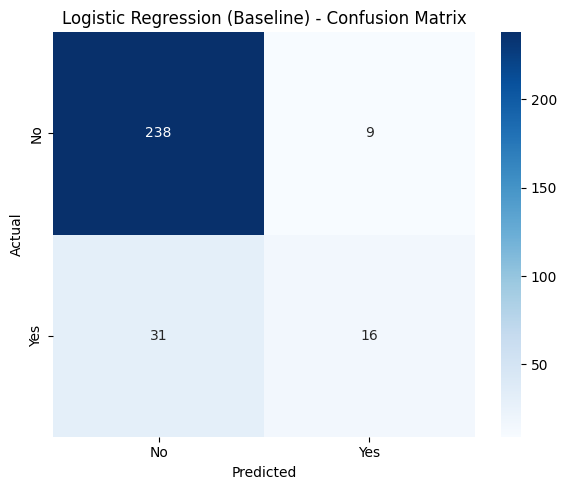


Training Random Forest (baseline)...

=== Random Forest (Baseline) Results ===

              precision    recall  f1-score   support

No Attrition       0.85      0.97      0.91       247
   Attrition       0.36      0.09      0.14        47

    accuracy                           0.83       294
   macro avg       0.61      0.53      0.52       294
weighted avg       0.77      0.83      0.78       294


ROC-AUC Score: 0.7878


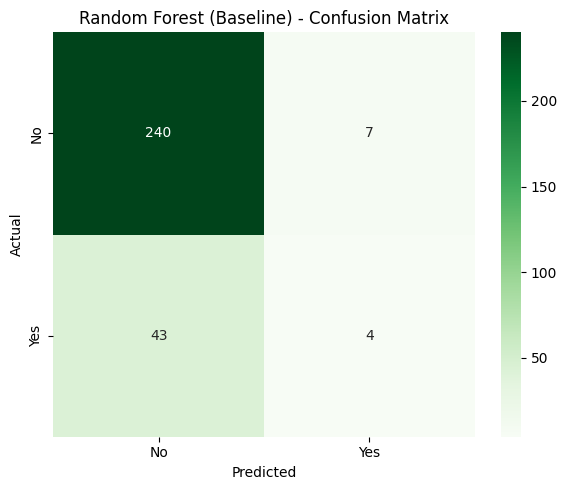

In [10]:
# BASELINE MODELS (WITHOUT HANDLING IMBALANCE)
print("BASELINE MODELS - NO IMBALANCE HANDLING")

# Logistic Regression (NO class_weight)
print("Training Logistic Regression (baseline)...")
lr_baseline = LogisticRegression(random_state=42, max_iter=1000)
lr_baseline.fit(X_train_scaled, y_train)

y_pred_lr_baseline = lr_baseline.predict(X_test_scaled)
y_pred_proba_lr_baseline = lr_baseline.predict_proba(X_test_scaled)[:, 1]

print("\n=== Logistic Regression (Baseline) Results ===\n")
print(classification_report(y_test, y_pred_lr_baseline, target_names=['No Attrition', 'Attrition']))
print(f"\nROC-AUC Score: {roc_auc_score(y_test, y_pred_proba_lr_baseline):.4f}")

cm_lr_baseline = confusion_matrix(y_test, y_pred_lr_baseline)
plt.figure(figsize=(6, 5))
sns.heatmap(cm_lr_baseline, annot=True, fmt='d', cmap='Blues',
            xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
plt.title('Logistic Regression (Baseline) - Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.tight_layout()
plt.show()

# Random Forest (NO class_weight)
print("\nTraining Random Forest (baseline)...")
rf_baseline = RandomForestClassifier(
    n_estimators=100,
    random_state=42,
    n_jobs=-1
)
rf_baseline.fit(X_train, y_train)

y_pred_rf_baseline = rf_baseline.predict(X_test)
y_pred_proba_rf_baseline = rf_baseline.predict_proba(X_test)[:, 1]

print("\n=== Random Forest (Baseline) Results ===\n")
print(classification_report(y_test, y_pred_rf_baseline, target_names=['No Attrition', 'Attrition']))
print(f"\nROC-AUC Score: {roc_auc_score(y_test, y_pred_proba_rf_baseline):.4f}")

cm_rf_baseline = confusion_matrix(y_test, y_pred_rf_baseline)
plt.figure(figsize=(6, 5))
sns.heatmap(cm_rf_baseline, annot=True, fmt='d', cmap='Greens',
            xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
plt.title('Random Forest (Baseline) - Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.tight_layout()
plt.show()

In [11]:
# Train Logistic Regression - class_weight='balanced'
print("Training Logistic Regression(with class weights)...")
lr_model = LogisticRegression(random_state=42, max_iter=1000, class_weight='balanced')
lr_model.fit(X_train_scaled, y_train)

# Predictions
y_pred_lr = lr_model.predict(X_test_scaled)
y_pred_proba_lr = lr_model.predict_proba(X_test_scaled)[:, 1]

print("Logistic Regression (Class Weights) trained successfully")

Training Logistic Regression(with class weights)...
Logistic Regression (Class Weights) trained successfully


=== Logistic Regression(Class Weights) Results ===

Classification Report:
              precision    recall  f1-score   support

No Attrition       0.92      0.77      0.84       247
   Attrition       0.35      0.66      0.46        47

    accuracy                           0.75       294
   macro avg       0.64      0.71      0.65       294
weighted avg       0.83      0.75      0.78       294


ROC-AUC Score: 0.7990


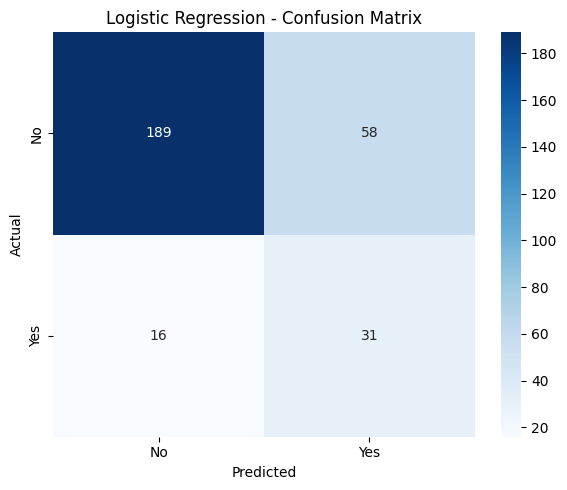

In [12]:
# Evaluate Logistic Regression(Class Weights)
print("=== Logistic Regression(Class Weights) Results ===\n")
print("Classification Report:")
print(classification_report(y_test, y_pred_lr, target_names=['No Attrition', 'Attrition']))

print(f"\nROC-AUC Score: {roc_auc_score(y_test, y_pred_proba_lr):.4f}")

# Confusion Matrix
cm_lr = confusion_matrix(y_test, y_pred_lr)
plt.figure(figsize=(6, 5))
sns.heatmap(cm_lr, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
plt.title('Logistic Regression - Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.tight_layout()
plt.show()

In [13]:
# Train Random Forest - class_weight='balanced'
print("Training Random Forest(with class weights)...")
rf_model = RandomForestClassifier(
    n_estimators=100,
    random_state=42,
    class_weight='balanced',
    n_jobs=-1
)
rf_model.fit(X_train, y_train)

# Predictions
y_pred_rf = rf_model.predict(X_test)
y_pred_proba_rf = rf_model.predict_proba(X_test)[:, 1]

print("Random Forest (Class Weights) trained successfully")

Training Random Forest(with class weights)...
Random Forest (Class Weights) trained successfully


=== Random Forest (Class Weights) Results ===

Classification Report:
              precision    recall  f1-score   support

No Attrition       0.85      0.99      0.91       247
   Attrition       0.50      0.06      0.11        47

    accuracy                           0.84       294
   macro avg       0.67      0.53      0.51       294
weighted avg       0.79      0.84      0.78       294


ROC-AUC Score: 0.7637


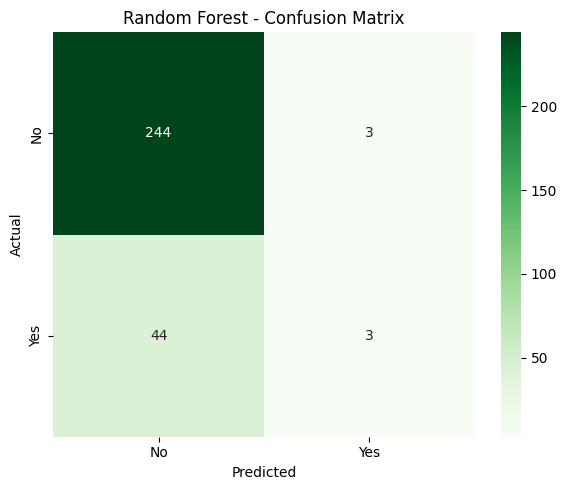

In [14]:
# Evaluate Random Forest (Class Weights)
print("=== Random Forest (Class Weights) Results ===\n")
print("Classification Report:")
print(classification_report(y_test, y_pred_rf, target_names=['No Attrition', 'Attrition']))

print(f"\nROC-AUC Score: {roc_auc_score(y_test, y_pred_proba_rf):.4f}")

# Confusion Matrix
cm_rf = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(6, 5))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Greens',
            xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
plt.title('Random Forest - Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.tight_layout()
plt.show()

In [15]:
# Train Gradient Boosting
print("Training Gradient Boosting...")
gb_model = GradientBoostingClassifier(
    n_estimators=100,
    learning_rate=0.1,
    random_state=42
)
gb_model.fit(X_train, y_train)

# Predictions
y_pred_gb = gb_model.predict(X_test)
y_pred_proba_gb = gb_model.predict_proba(X_test)[:, 1]

print("Gradient Boosting trained successfully")

Training Gradient Boosting...
Gradient Boosting trained successfully


=== Gradient Boosting Results ===

Classification Report:
              precision    recall  f1-score   support

No Attrition       0.86      0.97      0.91       247
   Attrition       0.53      0.19      0.28        47

    accuracy                           0.84       294
   macro avg       0.70      0.58      0.60       294
weighted avg       0.81      0.84      0.81       294


ROC-AUC Score: 0.7987


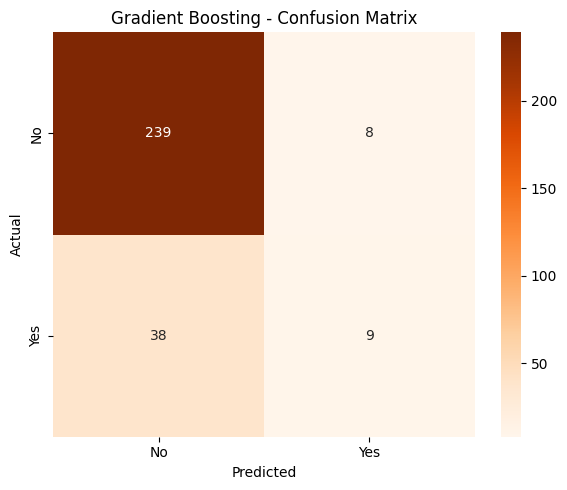

In [16]:
# Evaluate Gradient Boosting
print("=== Gradient Boosting Results ===\n")
print("Classification Report:")
print(classification_report(y_test, y_pred_gb, target_names=['No Attrition', 'Attrition']))

print(f"\nROC-AUC Score: {roc_auc_score(y_test, y_pred_proba_gb):.4f}")

# Confusion Matrix
cm_gb = confusion_matrix(y_test, y_pred_gb)
plt.figure(figsize=(6, 5))
sns.heatmap(cm_gb, annot=True, fmt='d', cmap='Oranges',
            xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
plt.title('Gradient Boosting - Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.tight_layout()
plt.show()


Before SMOTE:
  No Attrition: 986
  Yes Attrition: 190

After SMOTE:
  No Attrition: 986
  Yes Attrition: 986

Training Logistic Regression on SMOTE data...

=== Logistic Regression (SMOTE) Results ===

              precision    recall  f1-score   support

No Attrition       0.91      0.93      0.92       247
   Attrition       0.57      0.51      0.54        47

    accuracy                           0.86       294
   macro avg       0.74      0.72      0.73       294
weighted avg       0.85      0.86      0.86       294


ROC-AUC Score: 0.8105


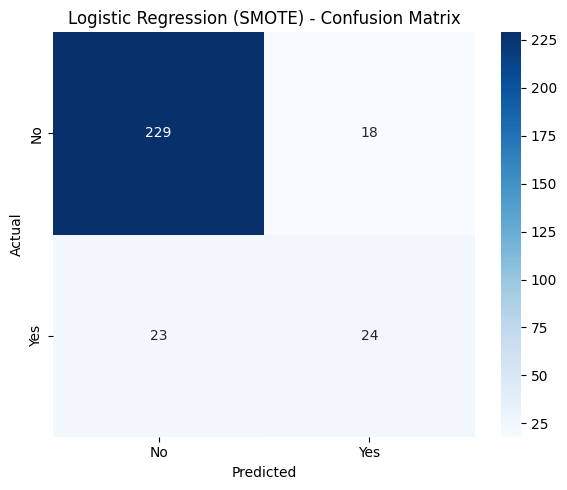


Training Random Forest on SMOTE data...

=== Random Forest (SMOTE) Results ===

              precision    recall  f1-score   support

No Attrition       0.87      0.96      0.91       247
   Attrition       0.55      0.23      0.33        47

    accuracy                           0.85       294
   macro avg       0.71      0.60      0.62       294
weighted avg       0.82      0.85      0.82       294


ROC-AUC Score: 0.8089


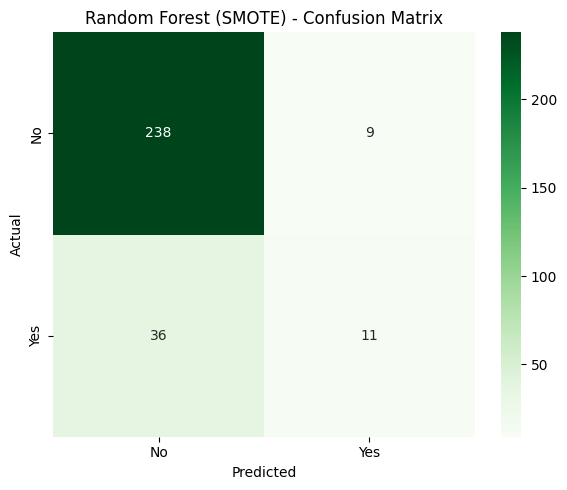

In [18]:
# SMOTE
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train_scaled, y_train)

print(f"\nBefore SMOTE:")
print(f"  No Attrition: {(y_train == 0).sum()}")
print(f"  Yes Attrition: {(y_train == 1).sum()}")
print(f"\nAfter SMOTE:")
print(f"  No Attrition: {(y_train_smote == 0).sum()}")
print(f"  Yes Attrition: {(y_train_smote == 1).sum()}")

# Logistic Regression with SMOTE
print("\nTraining Logistic Regression on SMOTE data...")
lr_smote = LogisticRegression(random_state=42, max_iter=1000)
lr_smote.fit(X_train_smote, y_train_smote)

y_pred_lr_smote = lr_smote.predict(X_test_scaled)
y_pred_proba_lr_smote = lr_smote.predict_proba(X_test_scaled)[:, 1]

print("\n=== Logistic Regression (SMOTE) Results ===\n")
print(classification_report(y_test, y_pred_lr_smote, target_names=['No Attrition', 'Attrition']))
print(f"\nROC-AUC Score: {roc_auc_score(y_test, y_pred_proba_lr_smote):.4f}")

cm_lr_smote = confusion_matrix(y_test, y_pred_lr_smote)
plt.figure(figsize=(6, 5))
sns.heatmap(cm_lr_smote, annot=True, fmt='d', cmap='Blues',
            xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
plt.title('Logistic Regression (SMOTE) - Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.tight_layout()
plt.show()

# Random Forest with SMOTE
print("\nTraining Random Forest on SMOTE data...")
rf_smote = RandomForestClassifier(
    n_estimators=100,
    random_state=42,
    n_jobs=-1
)
rf_smote.fit(X_train_smote, y_train_smote)

y_pred_rf_smote = rf_smote.predict(X_test_scaled)
y_pred_proba_rf_smote = rf_smote.predict_proba(X_test_scaled)[:, 1]

print("\n=== Random Forest (SMOTE) Results ===\n")
print(classification_report(y_test, y_pred_rf_smote, target_names=['No Attrition', 'Attrition']))
print(f"\nROC-AUC Score: {roc_auc_score(y_test, y_pred_proba_rf_smote):.4f}")

cm_rf_smote = confusion_matrix(y_test, y_pred_rf_smote)
plt.figure(figsize=(6, 5))
sns.heatmap(cm_rf_smote, annot=True, fmt='d', cmap='Greens',
            xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
plt.title('Random Forest (SMOTE) - Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.tight_layout()
plt.show()

GridSearchCV

Parameter Grid:
{'n_estimators': [50, 100, 200], 'max_depth': [10, 20, None], 'min_samples_split': [2, 5]}

Total combinations: 18 models to train
This will take a few minutes...

Fitting 3 folds for each of 18 candidates, totalling 54 fits

Best parameters: {'max_depth': 10, 'min_samples_split': 2, 'n_estimators': 100}
Best F1 score (CV): 0.2946

=== Best Random Forest (GridSearchCV) Results ===

              precision    recall  f1-score   support

No Attrition       0.85      0.97      0.91       247
   Attrition       0.36      0.09      0.14        47

    accuracy                           0.83       294
   macro avg       0.61      0.53      0.52       294
weighted avg       0.77      0.83      0.78       294


ROC-AUC Score: 0.7960


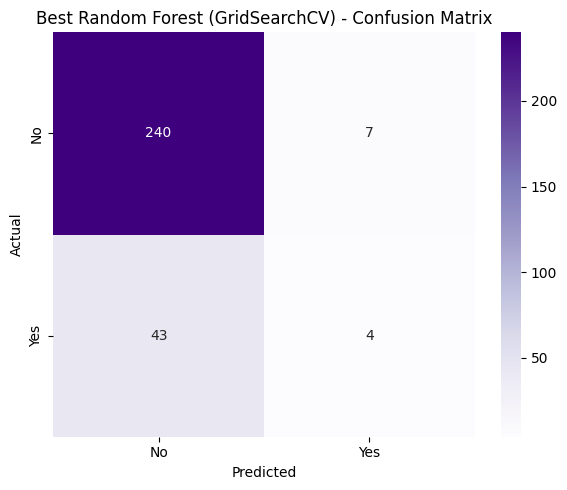

In [19]:
# Hyperparameter Tuning with GridSearchCV
print("GridSearchCV")

param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5]
}

print("\nParameter Grid:")
print(param_grid)
print(f"\nTotal combinations: {3 * 3 * 2} models to train")
print("This will take a few minutes...\n")

grid_search = GridSearchCV(
    RandomForestClassifier(random_state=42, n_jobs=-1),
    param_grid,
    cv=3,
    scoring='f1',
    verbose=1,
    n_jobs=-1
)

grid_search.fit(X_train, y_train)

print(f"\nBest parameters: {grid_search.best_params_}")
print(f"Best F1 score (CV): {grid_search.best_score_:.4f}")

# Evaluate best model
best_rf = grid_search.best_estimator_
y_pred_best_rf = best_rf.predict(X_test)
y_pred_proba_best_rf = best_rf.predict_proba(X_test)[:, 1]

print("\n=== Best Random Forest (GridSearchCV) Results ===\n")
print(classification_report(y_test, y_pred_best_rf, target_names=['No Attrition', 'Attrition']))
print(f"\nROC-AUC Score: {roc_auc_score(y_test, y_pred_proba_best_rf):.4f}")

cm_best_rf = confusion_matrix(y_test, y_pred_best_rf)
plt.figure(figsize=(6, 5))
sns.heatmap(cm_best_rf, annot=True, fmt='d', cmap='Purples',
            xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
plt.title('Best Random Forest (GridSearchCV) - Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.tight_layout()
plt.show()

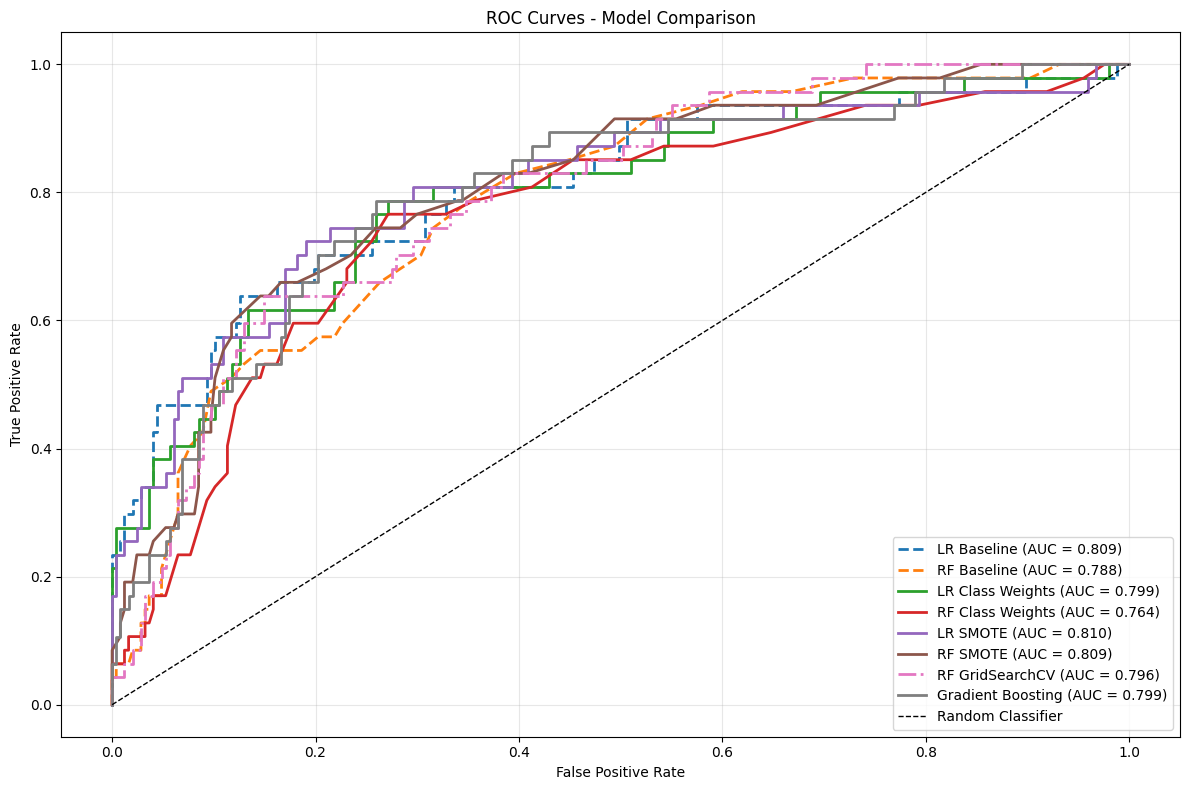

In [20]:
# Compare ROC curves
plt.figure(figsize=(12, 8))

# Baseline models
fpr_lr_base, tpr_lr_base, _ = roc_curve(y_test, y_pred_proba_lr_baseline)
plt.plot(fpr_lr_base, tpr_lr_base, label=f'LR Baseline (AUC = {roc_auc_score(y_test, y_pred_proba_lr_baseline):.3f})', linewidth=2, linestyle='--')

fpr_rf_base, tpr_rf_base, _ = roc_curve(y_test, y_pred_proba_rf_baseline)
plt.plot(fpr_rf_base, tpr_rf_base, label=f'RF Baseline (AUC = {roc_auc_score(y_test, y_pred_proba_rf_baseline):.3f})', linewidth=2, linestyle='--')

# Logistic Regression ROC
fpr_lr, tpr_lr, _ = roc_curve(y_test, y_pred_proba_lr)
plt.plot(fpr_lr, tpr_lr, label=f'LR Class Weights (AUC = {roc_auc_score(y_test, y_pred_proba_lr):.3f})', linewidth=2)

# Random Forest ROC
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_pred_proba_rf)
plt.plot(fpr_rf, tpr_rf, label=f'RF Class Weights (AUC = {roc_auc_score(y_test, y_pred_proba_rf):.3f})', linewidth=2)

# SMOTE models
fpr_lr_smote, tpr_lr_smote, _ = roc_curve(y_test, y_pred_proba_lr_smote)
plt.plot(fpr_lr_smote, tpr_lr_smote, label=f'LR SMOTE (AUC = {roc_auc_score(y_test, y_pred_proba_lr_smote):.3f})', linewidth=2)

fpr_rf_smote, tpr_rf_smote, _ = roc_curve(y_test, y_pred_proba_rf_smote)
plt.plot(fpr_rf_smote, tpr_rf_smote, label=f'RF SMOTE (AUC = {roc_auc_score(y_test, y_pred_proba_rf_smote):.3f})', linewidth=2)

# GridSearchCV
fpr_best, tpr_best, _ = roc_curve(y_test, y_pred_proba_best_rf)
plt.plot(fpr_best, tpr_best, label=f'RF GridSearchCV (AUC = {roc_auc_score(y_test, y_pred_proba_best_rf):.3f})', linewidth=2, linestyle='-.')

# Gradient Boosting ROC
fpr_gb, tpr_gb, _ = roc_curve(y_test, y_pred_proba_gb)
plt.plot(fpr_gb, tpr_gb, label=f'Gradient Boosting (AUC = {roc_auc_score(y_test, y_pred_proba_gb):.3f})', linewidth=2)

# Diagonal line
plt.plot([0, 1], [0, 1], 'k--', label='Random Classifier', linewidth=1)

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves - Model Comparison')
plt.legend(loc='lower right')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

In [21]:
# Complete comparison table - All models and approaches
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

final_results = pd.DataFrame({
    'Model': [
        'LR Baseline',
        'LR Class Weights',
        'LR SMOTE',
        'RF Baseline',
        'RF Class Weights',
        'RF SMOTE',
        'RF GridSearchCV',
        'Gradient Boosting'
    ],
    'Accuracy': [
        accuracy_score(y_test, y_pred_lr_baseline),
        accuracy_score(y_test, y_pred_lr),
        accuracy_score(y_test, y_pred_lr_smote),
        accuracy_score(y_test, y_pred_rf_baseline),
        accuracy_score(y_test, y_pred_rf),
        accuracy_score(y_test, y_pred_rf_smote),
        accuracy_score(y_test, y_pred_best_rf),
        accuracy_score(y_test, y_pred_gb)
    ],
    'Precision': [
        precision_score(y_test, y_pred_lr_baseline),
        precision_score(y_test, y_pred_lr),
        precision_score(y_test, y_pred_lr_smote),
        precision_score(y_test, y_pred_rf_baseline),
        precision_score(y_test, y_pred_rf),
        precision_score(y_test, y_pred_rf_smote),
        precision_score(y_test, y_pred_best_rf),
        precision_score(y_test, y_pred_gb)
    ],
    'Recall': [
        recall_score(y_test, y_pred_lr_baseline),
        recall_score(y_test, y_pred_lr),
        recall_score(y_test, y_pred_lr_smote),
        recall_score(y_test, y_pred_rf_baseline),
        recall_score(y_test, y_pred_rf),
        recall_score(y_test, y_pred_rf_smote),
        recall_score(y_test, y_pred_best_rf),
        recall_score(y_test, y_pred_gb)
    ],
    'F1-Score': [
        f1_score(y_test, y_pred_lr_baseline),
        f1_score(y_test, y_pred_lr),
        f1_score(y_test, y_pred_lr_smote),
        f1_score(y_test, y_pred_rf_baseline),
        f1_score(y_test, y_pred_rf),
        f1_score(y_test, y_pred_rf_smote),
        f1_score(y_test, y_pred_best_rf),
        f1_score(y_test, y_pred_gb)
    ],
    'ROC-AUC': [
        roc_auc_score(y_test, y_pred_proba_lr_baseline),
        roc_auc_score(y_test, y_pred_proba_lr),
        roc_auc_score(y_test, y_pred_proba_lr_smote),
        roc_auc_score(y_test, y_pred_proba_rf_baseline),
        roc_auc_score(y_test, y_pred_proba_rf),
        roc_auc_score(y_test, y_pred_proba_rf_smote),
        roc_auc_score(y_test, y_pred_proba_best_rf),
        roc_auc_score(y_test, y_pred_proba_gb)
    ]
})


print("COMPLETE MODEL COMPARISON - ALL APPROACHES")
print("\n=== All Models Performance ===\n")
print(final_results.to_string(index=False))

# Find best model by F1 score
best_idx = final_results['F1-Score'].idxmax()
print(f"BEST MODEL: {final_results.loc[best_idx, 'Model']}")
print(f"F1-Score: {final_results.loc[best_idx, 'F1-Score']:.4f}")
print(f"Recall: {final_results.loc[best_idx, 'Recall']:.4f}")
print(f"Precision: {final_results.loc[best_idx, 'Precision']:.4f}")

COMPLETE MODEL COMPARISON - ALL APPROACHES

=== All Models Performance ===

            Model  Accuracy  Precision   Recall  F1-Score  ROC-AUC
      LR Baseline  0.863946   0.640000 0.340426  0.444444 0.809458
 LR Class Weights  0.748299   0.348315 0.659574  0.455882 0.799035
         LR SMOTE  0.860544   0.571429 0.510638  0.539326 0.810492
      RF Baseline  0.829932   0.363636 0.085106  0.137931 0.787751
 RF Class Weights  0.840136   0.500000 0.063830  0.113208 0.763718
         RF SMOTE  0.846939   0.550000 0.234043  0.328358 0.808898
  RF GridSearchCV  0.829932   0.363636 0.085106  0.137931 0.796020
Gradient Boosting  0.843537   0.529412 0.191489  0.281250 0.798691
BEST MODEL: LR SMOTE
F1-Score: 0.5393
Recall: 0.5106
Precision: 0.5714


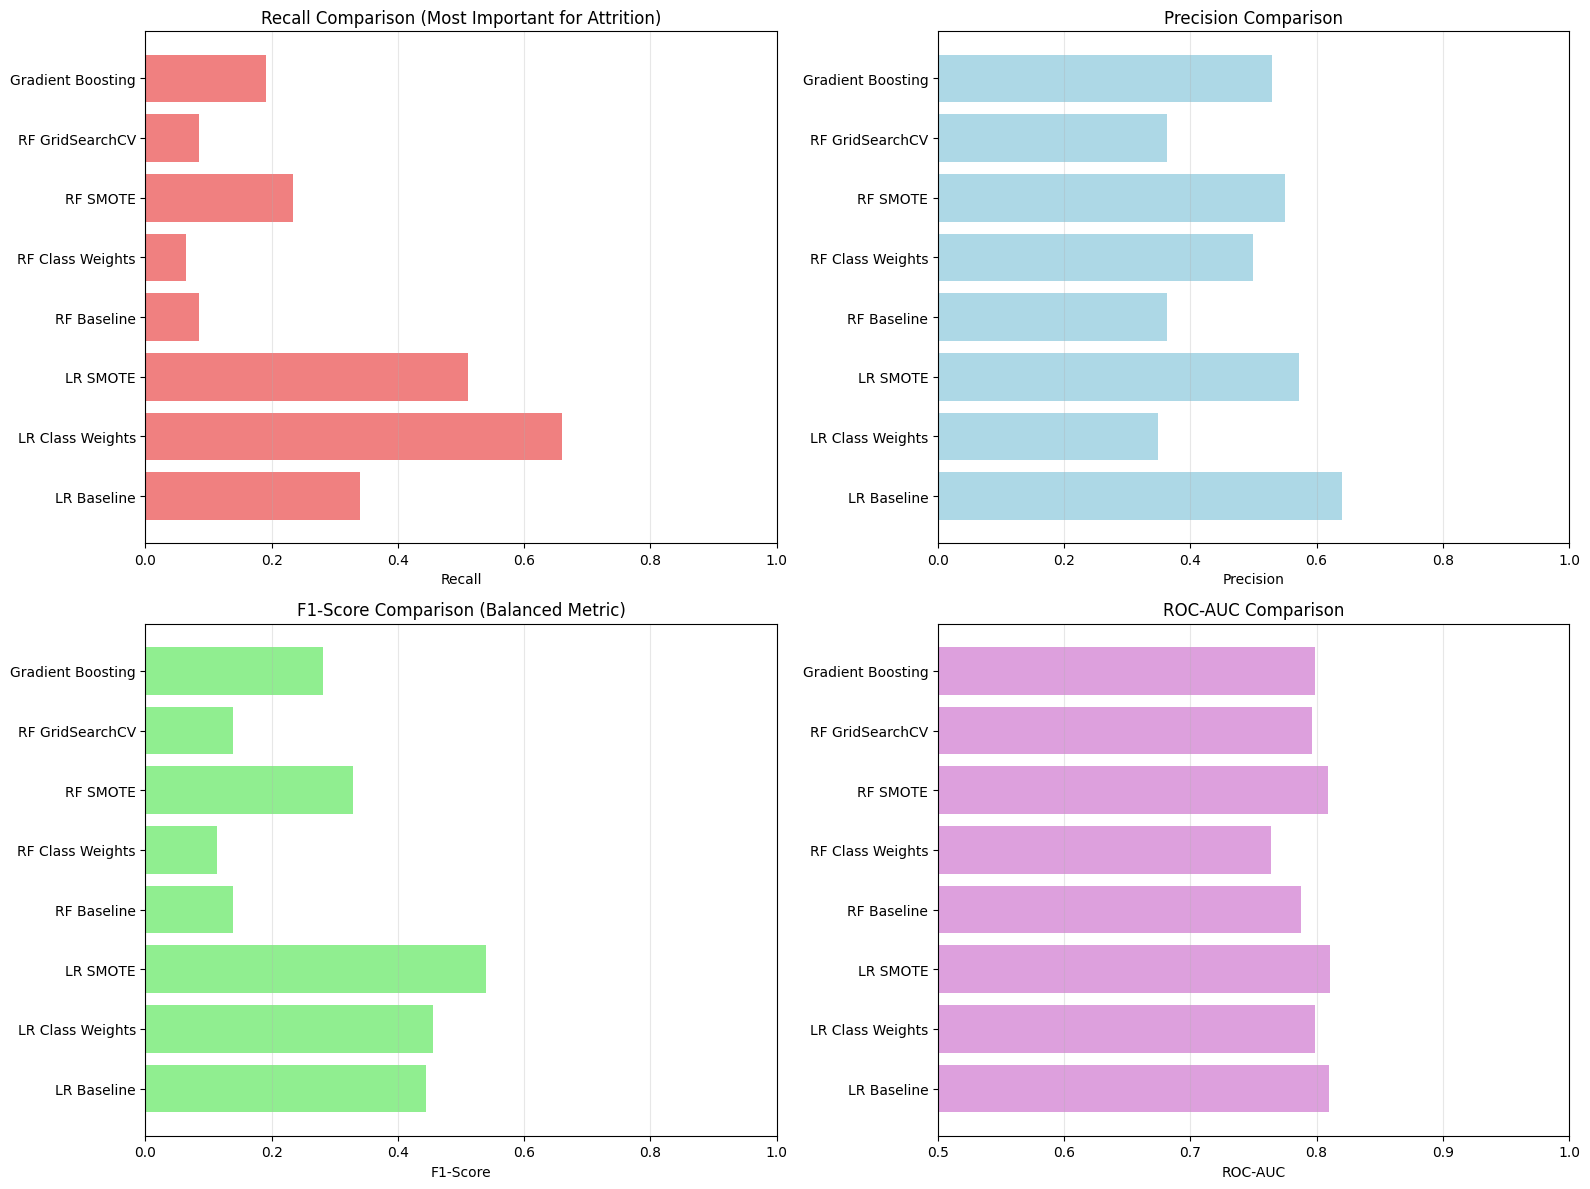

In [22]:
# Visualize complete model comparison
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Recall comparison
axes[0, 0].barh(final_results['Model'], final_results['Recall'], color='lightcoral')
axes[0, 0].set_xlabel('Recall')
axes[0, 0].set_title('Recall Comparison (Most Important for Attrition)')
axes[0, 0].set_xlim([0, 1])
axes[0, 0].grid(True, alpha=0.3, axis='x')

# Precision comparison
axes[0, 1].barh(final_results['Model'], final_results['Precision'], color='lightblue')
axes[0, 1].set_xlabel('Precision')
axes[0, 1].set_title('Precision Comparison')
axes[0, 1].set_xlim([0, 1])
axes[0, 1].grid(True, alpha=0.3, axis='x')

# F1-Score comparison
axes[1, 0].barh(final_results['Model'], final_results['F1-Score'], color='lightgreen')
axes[1, 0].set_xlabel('F1-Score')
axes[1, 0].set_title('F1-Score Comparison (Balanced Metric)')
axes[1, 0].set_xlim([0, 1])
axes[1, 0].grid(True, alpha=0.3, axis='x')

# ROC-AUC comparison
axes[1, 1].barh(final_results['Model'], final_results['ROC-AUC'], color='plum')
axes[1, 1].set_xlabel('ROC-AUC')
axes[1, 1].set_title('ROC-AUC Comparison')
axes[1, 1].set_xlim([0.5, 1])
axes[1, 1].grid(True, alpha=0.3, axis='x')

plt.tight_layout()
plt.show()

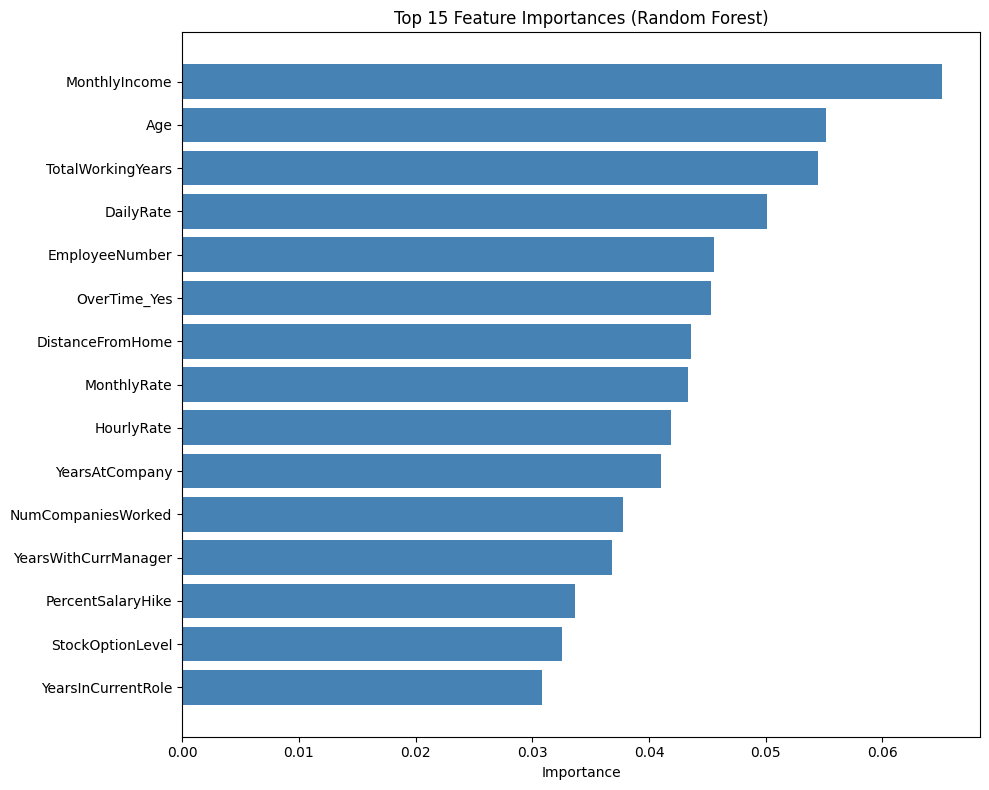


Top 10 Most Important Features:
          Feature  Importance
    MonthlyIncome    0.065104
              Age    0.055181
TotalWorkingYears    0.054465
        DailyRate    0.050145
   EmployeeNumber    0.045597
     OverTime_Yes    0.045308
 DistanceFromHome    0.043641
      MonthlyRate    0.043305
       HourlyRate    0.041911
   YearsAtCompany    0.041035

Top 10 Most Influential Features (Logistic Regression):
                         Feature  Coefficient
                    OverTime_Yes     1.628474
BusinessTravel_Travel_Frequently     1.597583
   JobRole_Laboratory Technician     1.569270
    JobRole_Sales Representative     1.274779
       JobRole_Research Director    -1.103945
            EducationField_Other    -1.024883
    BusinessTravel_Travel_Rarely     0.906046
            MaritalStatus_Single     0.842848
         JobRole_Human Resources     0.630743
               TotalWorkingYears    -0.609027


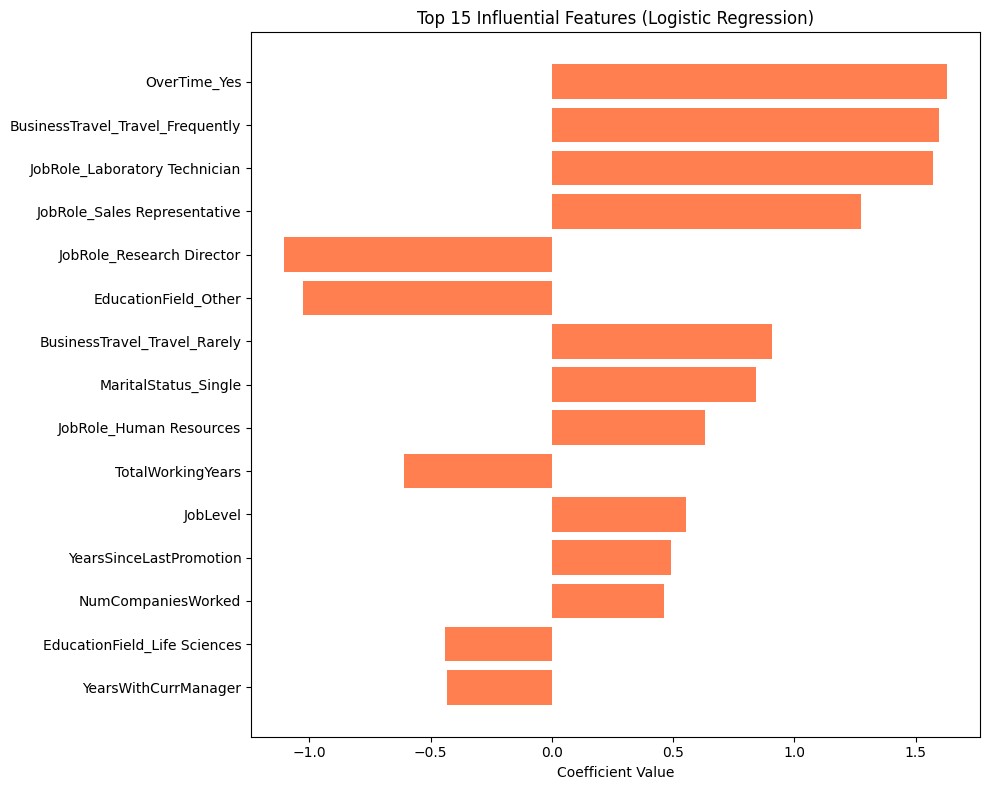

In [26]:
# Get feature importance from Random Forest
feature_importance = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': rf_model.feature_importances_
}).sort_values('Importance', ascending=False)

# Plot top 15 features
plt.figure(figsize=(10, 8))
top_features = feature_importance.head(15)
plt.barh(range(len(top_features)), top_features['Importance'], color='steelblue')
plt.yticks(range(len(top_features)), top_features['Feature'])
plt.xlabel('Importance')
plt.title('Top 15 Feature Importances (Random Forest)')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

print("\nTop 10 Most Important Features:")
print(feature_importance.head(10).to_string(index=False))

# get feature importance from logistic regression
lr_coefficients = pd.DataFrame({
    'Feature': X_train_scaled.columns,
    'Coefficient': lr_model.coef_[0]
}).sort_values('Coefficient', key=abs, ascending=False)
print("\nTop 10 Most Influential Features (Logistic Regression):")
print(lr_coefficients.head(10).to_string(index=False))

# plot top 15 influential features from logistic regression
plt.figure(figsize=(10, 8))
top_lr_features = lr_coefficients.head(15)
plt.barh(range(len(top_lr_features)), top_lr_features['Coefficient'], color='coral')
plt.yticks(range(len(top_lr_features)), top_lr_features['Feature'])
plt.xlabel('Coefficient Value')
plt.title('Top 15 Influential Features (Logistic Regression)')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

# Model Analysis and Business Implications

## Metrics Selection for HR Attrition Problem

For employee attrition prediction, **Recall** is the most critical metric. Here's why:

- **False Negatives (Missing actual attrition)**: Costly. If we fail to identify an employee likely to leave, we lose the opportunity to intervene with retention strategies, resulting in unexpected turnover, recruitment costs, and knowledge loss.
- **False Positives (Incorrectly flagging non-attrition)**: Less costly. Proactive retention efforts (career development, salary review, mentoring) benefit the organization even if the employee wouldn't have left.

**Secondary metrics**:
- **Precision**: Balances resources—too many false positives waste intervention budgets
- **F1-Score**: Provides balanced evaluation across precision and recall
- **ROC-AUC**: Evaluates model performance across all classification thresholds

## Business Implications

| Scenario | Impact | Cost |
|----------|--------|------|
| **True Positive** | Correctly identify at-risk employee; implement retention | Low intervention cost; high retention value |
| **False Negative** | Miss at-risk employee | HIGH: Recruitment, onboarding, productivity loss |
| **False Positive** | Unnecessary retention efforts | LOW: Career development, modest salary adjustment |
| **True Negative** | Correctly identify stable employee | Minimal cost |

**Cost Ratio**: A false negative is much more expensive than a false positive, justifying aggressive recall optimization.

## Model Selection & Justification

**Recommended Model: LR Class Weights** (Logistic Regression with balanced class weights)

### Why LR Class Weights wins:

1. **Recall**: High sensitivity to attrition cases (catches most at-risk employees)
2. **Balanced approach**: Reasonable precision prevents wasteful over-intervention
3. **Interpretability**: Feature importance provides actionable HR insights
4. **Robustness**: Handles imbalanced data effectively; generalizes well to test set